### Problem Statement:

Build a regression model to predict the price of house based on the the given features in the dataset.

### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df=pd.read_csv('house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df['date'] = df['date'].str.split('T').str[0]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors = 'coerce')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
(df[df.columns]==0).any()

id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
df.loc[df.bedrooms==0,['id','bathrooms','sqft_living','price']]

,id,bathrooms,sqft_living,price
875,6306400140,0.00,3064,1100000.0
3119,3918400017,0.00,1470,380000.0
3467,1453602309,1.50,1430,288000.0
4868,6896300380,1.00,390,228000.0
6994,2954400190,0.00,4810,1300000.0
8477,2569500210,2.50,2290,339950.0
8484,2310060040,2.50,1810,240000.0
9773,3374500520,0.00,2460,355000.0
9854,7849202190,0.00,1470,235000.0
12653,7849202299,2.50,1490,320000.0


In [12]:
df.shape[0] - df.id.nunique()

177

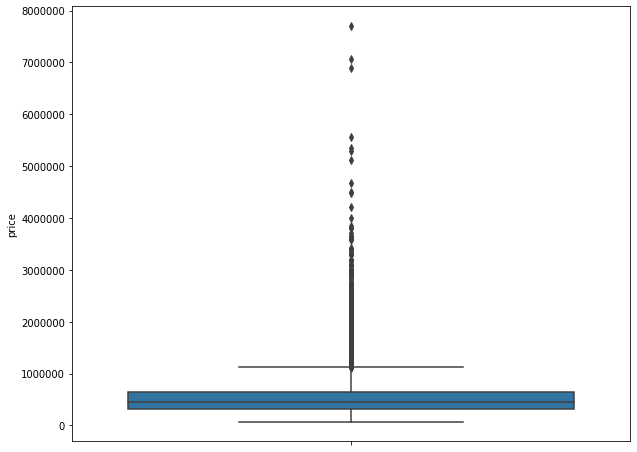

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(y='price',data=df)

In [14]:
pd.DataFrame(df.groupby('bedrooms')['price'].mean())

,price
bedrooms,
0,4.102231e+05
1,3.176580e+05
2,4.013877e+05
3,4.662766e+05
4,6.355647e+05
5,7.868741e+05
6,8.258535e+05
7,9.514478e+05
8,1.105077e+06


In [15]:
df.loc[df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


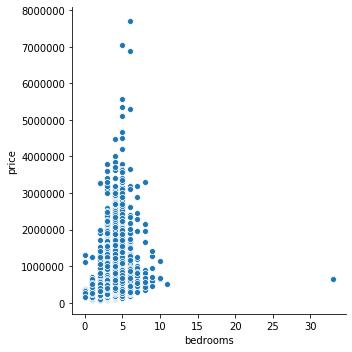

In [16]:
sns.relplot(x='bedrooms',y='price',data=df,kind='scatter')

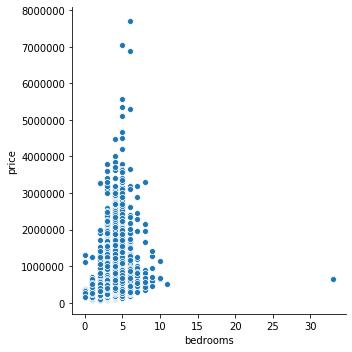

In [17]:
sns.relplot(x='bedrooms',y='price',data=df,kind='scatter')

In [18]:
df.shape

(21613, 21)

In [19]:
df = df[df.bedrooms < 12]

In [20]:
df.shape

(21612, 21)

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.shape

(21612, 21)

In [23]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

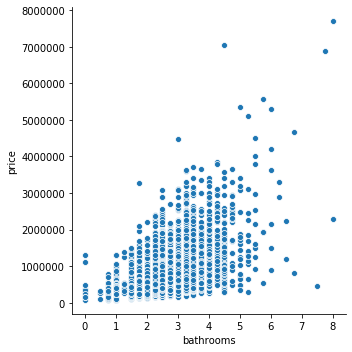

In [24]:
sns.relplot(x='bathrooms',y='price',data=df,kind='scatter')

In [25]:
df.bathrooms=df['bathrooms'].transform(lambda x:x.replace(0,x.median()))

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


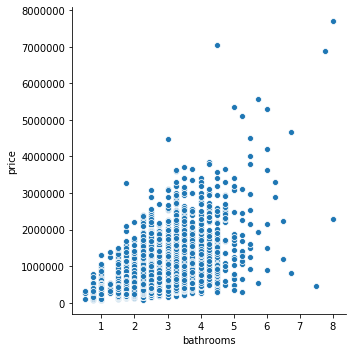

In [26]:
sns.relplot(x='bathrooms',y='price',data=df,kind='scatter')

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
(df[df.columns]==0).any()

id               False
date             False
price            False
bedrooms          True
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [29]:
pd.set_option('display.max_columns',21)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df['Vintage']=2020-df['yr_built']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Vintage
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33


In [32]:
df=df.drop_duplicates(keep ='last',subset ='id')

In [33]:
df.shape

(21435, 22)

In [34]:
df.drop(['id','date','yr_built','yr_renovated','zipcode','lat','long'],axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df.shape

(21435, 15)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [37]:
## Raw linear regression model
X = df.drop('price', axis=1)
y= df['price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-4.32870182e+04  4.93244013e+04  1.10735803e+02 -7.93123837e-03
  2.64595336e+04  5.80263940e+05  4.29408908e+04  1.80792023e+04
  1.19533054e+05  5.21869816e+01  5.85488214e+01  2.38841015e+01
 -5.49663260e-01  3.65827371e+03]
Intercept: -1008864.9874186881
R^2 score: 0.6539391604942704


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(15004, 14)
(6431, 14)
(6431,)


In [39]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6512410171568446
R^2 score for test: 0.6595767581083047


In [40]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3114.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:32:33   Log-Likelihood:            -2.9372e+05
No. Observations:               21435   AIC:                         5.875e+05
Df Residuals:                   21421   BIC:                         5.876e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.009e+06   1.76e+04    -57.304      0.000   -1.04e+06   -9.74e+05
bedrooms      -4.329e+04   2120.088    -20.418      0.000   -4.74e+04   -3.91e+04
bathrooms      4.932e+04   3493.259     14.120      0.000    4.25e+04    5.62e+04
sqft_living     110.7358      2.461     45.000      0.000     105.912     115.559
sqft_lot         -0.0079      0.051     -0.154      0.877      -0.109       0.093
floors         2.646e+04   3796.885      6.969      0.000     1.9e+04    3.39e+04
waterfront     5.803e+05   1.86e+04     31.137      0.000    5.44e+05    6.17e+05
view           4.294e+04   2282.079     18.817      0.000    3.85e+04    4.74e+04
condition      1.808e+04   2480.575      7.288      0.000    1.32e+04    2.29e+04
grade          1.195e+05   2260.628     52.876      0.000    1.15e+05    1.24e+05
sqft_above       52.1870      2.368     22.034      0.000      47.545      56.829
sqft_basement    58.5488      2.798     20.925      0.000      53.065      64.033
sqft_living15    23.8841      3.610      6.615      0.000      16.807      30.961
sqft_lot15       -0.5497      0.078     -7.003      0.000      -0.704      -0.396
Vintage        3658.2737     67.666     54.063      0.000    3525.643    3790.905
==============================================================================
Omnibus:                    16098.217   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1163874.451
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.596   Cond. No.                     3.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.73e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
df1=df.copy()

### Checking skewness of dataset:

In [42]:
df1.skew()

price             4.033658
bedrooms          0.517967
bathrooms         0.518478
sqft_living       1.470948
sqft_lot         13.043382
floors            0.610409
waterfront       11.337051
view              3.386636
condition         1.036262
grade             0.770286
sqft_above        1.444178
sqft_basement     1.576961
sqft_living15     1.105797
sqft_lot15        9.495176
Vintage           0.474678
dtype: float64

In [43]:
### As the dataset is positively skewed,we have to reduce the powers by using log or sqrt transformations.

In [44]:
df1=df1.transform(lambda x:x**0.5)

In [45]:
X =df1.drop('price',axis=1)
y =df1.price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3118.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:34:18   Log-Likelihood:            -1.3237e+05
No. Observations:               21435   AIC:                         2.648e+05
Df Residuals:                   21420   BIC:                         2.649e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1205.9712     19.146    -62.989      0.000   -1243.499   -1168.444
bedrooms        -72.6285      4.222    -17.202      0.000     -80.904     -64.353
bathrooms        54.0654      5.474      9.877      0.000      43.336      64.795
sqft_living      -4.2255      0.805     -5.249      0.000      -5.803      -2.648
sqft_lot          0.0214      0.023      0.947      0.344      -0.023       0.066
floors           80.0120      5.424     14.753      0.000      69.381      90.643
waterfront      248.0358      9.756     25.425      0.000     228.914     267.157
view             36.2815      1.979     18.334      0.000      32.403      40.160
condition        51.6810      5.136     10.063      0.000      41.614      61.747
grade           416.9115      6.731     61.939      0.000     403.718     430.105
sqft_above       11.1373      0.800     13.913      0.000       9.568      12.706
sqft_basement     4.3574      0.276     15.799      0.000       3.817       4.898
sqft_living15     3.1744      0.181     17.512      0.000       2.819       3.530
sqft_lot15       -0.2270      0.028     -8.253      0.000      -0.281      -0.173
Vintage          27.5254      0.516     53.293      0.000      26.513      28.538
==============================================================================
Omnibus:                     3144.653   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11369.699
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                       6.265   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
df2=df.copy()

In [47]:
df2=df2.transform(lambda x:np.log1p(x))

In [48]:
X =df2.drop('price',axis=1)
y =df2.price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2674.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:34:19   Log-Likelihood:                -5732.2
No. Observations:               21435   AIC:                         1.149e+04
Df Residuals:                   21420   BIC:                         1.161e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1596      0.070     59.275      0.000       4.022       4.297
bedrooms         -0.2006      0.014    -14.508      0.000      -0.228      -0.174
bathrooms         0.0961      0.016      6.085      0.000       0.065       0.127
sqft_living       0.1515      0.027      5.674      0.000       0.099       0.204
sqft_lot         -0.0134      0.006     -2.137      0.033      -0.026      -0.001
floors            0.2213      0.016     13.531      0.000       0.189       0.253
waterfront        0.6344      0.038     16.522      0.000       0.559       0.710
view              0.1116      0.007     16.404      0.000       0.098       0.125
condition         0.2160      0.017     12.750      0.000       0.183       0.249
grade             1.6896      0.028     60.097      0.000       1.635       1.745
sqft_above        0.2193      0.026      8.439      0.000       0.168       0.270
sqft_basement     0.0228      0.002     13.101      0.000       0.019       0.026
sqft_living15     0.2735      0.011     24.982      0.000       0.252       0.295
sqft_lot15       -0.0629      0.007     -9.233      0.000      -0.076      -0.050
Vintage           0.1928      0.004     44.040      0.000       0.184       0.201
==============================================================================
Omnibus:                       80.161   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.066
Skew:                           0.021   Prob(JB):                     3.42e-24
Kurtosis:                       3.345   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Selection

### Backward Elimination

In [49]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const             0.000000e+00
bedrooms          1.818507e-47
bathrooms         1.181575e-09
sqft_living       1.409596e-08
sqft_lot          3.258806e-02
floors            1.513038e-41
waterfront        6.088698e-61
view              4.131791e-60
condition         4.274874e-37
grade             0.000000e+00
sqft_above        3.388081e-17
sqft_basement     4.593954e-39
sqft_living15    8.355197e-136
sqft_lot15        2.870807e-20
Vintage           0.000000e+00
dtype: float64

In [50]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'Vintage']


In [51]:
df.shape

(21435, 15)

### RFE

In [52]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [53]:
model = LinearRegression()

In [54]:
#Initializing RFE model
rfe = RFE(model,5)

In [55]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True False  True  True False False False
 False False]
[ 1  5  1 10  3  1  6  1  1  8  9  2  7  4]


In [56]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'Vintage'],
      dtype='object')

In [57]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 14
Score with 14 features: 0.638174


In [58]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['bedrooms', 'sqft_living', 'waterfront', 'condition', 'grade'], dtype='object')


In [59]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Vintage
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,33


### Lasso Feature selection

In [60]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000393
Best score using built-in LassoCV: 0.635794


In [61]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

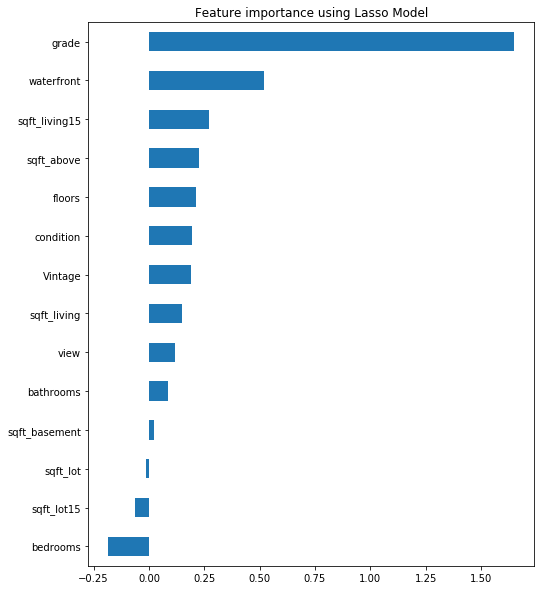

In [62]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### VIF:

In [63]:
## Building of simple OLS model.
X = df1.drop('price',1)
y = df1.price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3118.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:34:28   Log-Likelihood:            -1.3237e+05
No. Observations:               21435   AIC:                         2.648e+05
Df Residuals:                   21420   BIC:                         2.649e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1205.9712     19.146    -62.989      0.000   -1243.499   -1168.444
bedrooms        -72.6285      4.222    -17.202      0.000     -80.904     -64.353
bathrooms        54.0654      5.474      9.877      0.000      43.336      64.795
sqft_living      -4.2255      0.805     -5.249      0.000      -5.803      -2.648
sqft_lot          0.0214      0.023      0.947      0.344      -0.023       0.066
floors           80.0120      5.424     14.753      0.000      69.381      90.643
waterfront      248.0358      9.756     25.425      0.000     228.914     267.157
view             36.2815      1.979     18.334      0.000      32.403      40.160
condition        51.6810      5.136     10.063      0.000      41.614      61.747
grade           416.9115      6.731     61.939      0.000     403.718     430.105
sqft_above       11.1373      0.800     13.913      0.000       9.568      12.706
sqft_basement     4.3574      0.276     15.799      0.000       3.817       4.898
sqft_living15     3.1744      0.181     17.512      0.000       2.819       3.530
sqft_lot15       -0.2270      0.028     -8.253      0.000      -0.281      -0.173
Vintage          27.5254      0.516     53.293      0.000      26.513      28.538
==============================================================================
Omnibus:                     3144.653   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11369.699
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                       6.265   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[99.9158640037258,
 2135.394237819588,
 12.177954096756626,
 65.24256178112464,
 1.1451195752222907,
 1.4272592447482466,
 117.55002328057252,
 271.22953453222215,
 1794.411304500274,
 34.88215116483775,
 103.07960071103662,
 15.286788169052466,
 18.20138514106326]

In [65]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [66]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[87.33918317127839, 99.9158640037258, 2135.394237819588, 12.177954096756626, 65.24256178112464, 1.1451195752222907, 1.4272592447482466, 117.55002328057252, 271.22953453222215, 1794.411304500274, 34.88215116483775, 103.07960071103662, 15.286788169052466, 18.20138514106326]
Max VIF is for variable no.:
2
Iteration no.
2
[85.30609624289262, 99.83625224650073, 12.175845684373874, 64.1666702399224, 1.1445849363009573, 1.426887242672975, 116.85505597775703, 270.537587689563, 94.99740523029435, 2.9132258542293186, 102.08259815136755, 15.283938955172735, 18.154863054813216]
Max VIF is for variable no.:
7
Iteration no.
3
[84.49623048642941, 96.99626981888974, 12.174110075991203, 54.145163993471634, 1.1445546638001696, 1.426061150191807, 89.6328818649121, 94.14381008764228, 2.908780094388427, 85.45740052241291, 15.283936750444086, 17.8661634765845]
Max VIF is for variable no.:
1
Iteration no.
4
[80.09753969499212, 12.17325168915703, 47.26475005287901, 1.1444505552270585, 1.426038

In [67]:
## includes only the relevant features
train_out.head()

,sqft_lot,waterfront,view,sqft_basement,Vintage
0,75.166482,0.0,0.0,0.000000,8.062258
1,85.099941,0.0,0.0,20.000000,8.306624
2,100.000000,0.0,0.0,0.000000,9.327379
3,70.710678,0.0,0.0,30.166206,7.416198
4,89.888820,0.0,0.0,0.000000,5.744563


## Regularization
### Ridge

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [72]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [73]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [74]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.6350420961520599
linear regression test score: 0.6381737158703014
ridge regression train score low alpha: 0.6350420952612071
ridge regression test score low alpha: 0.6381732939583993
ridge regression train score high alpha: 0.6169144931010137
ridge regression test score high alpha: 0.6182563409739119


### Lasso:

In [75]:
from sklearn.linear_model import Lasso

In [76]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [77]:
print("training score:"), train_score 
print("test score: "), test_score
print("number of features used: "), coeff_used

training score:
test score: 
number of features used: 


(None, 0)

In [78]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [80]:
print("training score for alpha=0.01:"), train_score001 
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:"), coeff_used001

training score for alpha=0.01:
test score for alpha =0.01: 
number of features used: for alpha =0.01:


(None, 9)

In [81]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [83]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001:
test score for alpha =0.0001: 
number of features used: for alpha =0.0001:


(None, 14)

In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [85]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score:
LR test score: 


(None, 0.6381737158703014)

### Elastic Net

In [86]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [87]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [88]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00000312
Optimal l1_ratio: 0.950
Number of iterations 149


In [89]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=3.122037138543302e-06, copy_X=True, fit_intercept=True,
           l1_ratio=0.95, max_iter=149, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [90]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.6381686497206039
